In [1]:
import numpy as np 
import pandas as pd 

import tensorflow as tf 
import keras 


2024-04-06 13:38:17.615894: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE3 SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
df = pd.read_csv("dataset/Churn_Modelling.csv")

df.head()

 
#______________________Info About The Dataset_________________________

# আমাদের এইখানে, RowNumber, CustomerId, Surname তেমন কোন কাজের না । 
# CredicScore -> customer এর credibility এর হিসাব করে । 
# Tenure -> কত সাল ধরে customer এই banker সাথে যুক্ত । 
# Number of products -> debit cart, credit cart etc.
# HasCrCard -> (Number of credit card) 
# isActiveMember -> (depends on number of trasaction)
# EstimatedSalary -> (customer এর income)
# Exited বলে customer টা এখনো bank এ আছে নাকি নাই । 



,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:

# Check the shape of the dataset:
df.shape

(10000, 14)

In [4]:

# check if there any null vaule present

df.isnull().sum()


RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [5]:

# Check Data Type:

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [6]:

# Check Duplicate Row:

df.duplicated().sum()

0

In [7]:

# Check how many person left the bank:

df["Exited"].value_counts()

# 1 bank ছেড়ে চলে গেছে । 


0    7963
1    2037
Name: Exited, dtype: int64

In [8]:

# simillary check geography and gender

df["Geography"].value_counts()


France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [9]:

df["Gender"].value_counts()


Male      5457
Female    4543
Name: Gender, dtype: int64

In [10]:

# আমাদের এইখানে, RowNumber, CustomerId, Surname তেমন কোন কাজের না । 
# so, drop these column:

# inplace = ture ; so that the df.drop actually drop from real df. otherwise we will create another variable.

df.drop(columns=["RowNumber",	"CustomerId",	"Surname" ],inplace=True)

df.head()


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [11]:

# manage categorical data: 


# drop_first=True convert one_hot_encoding_scheme to dummy_coding_scheme

df = pd.get_dummies(df,columns=["Geography"	,"Gender"],drop_first=True)

df

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,1,0,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,1,0,1


In [12]:

# doing train test split 

X = df.drop(columns=["Exited"])
y = df["Exited"]


from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=1)




In [13]:

# do feature scaling 

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X_train)

X_train_sc = sc.transform(X_train)
X_test_sc = sc.transform(X_test)



In [14]:
X_train_sc

array([[-0.23082038, -0.94449979, -0.70174202, ...,  1.71490137,
        -0.57273139,  0.91509065],
       [-0.25150912, -0.94449979, -0.35520275, ..., -0.58312392,
        -0.57273139, -1.09278791],
       [-0.3963303 ,  0.77498705,  0.33787579, ...,  1.71490137,
        -0.57273139, -1.09278791],
       ...,
       [ 0.22433188,  0.58393295,  1.3774936 , ..., -0.58312392,
        -0.57273139, -1.09278791],
       [ 0.13123255,  0.01077067,  1.03095433, ..., -0.58312392,
        -0.57273139, -1.09278791],
       [ 1.1656695 ,  0.29735181,  0.33787579, ...,  1.71490137,
        -0.57273139,  0.91509065]])

<br>

---

### keras এ আমরা দুই ধরনের model create করতে পারি । 
- i) sequential 
- ii) non sequential 
**Beginner হিসেবে আমরা sequential model নিয়ে কাজ করবো**

### model create করার পর আমরা সেই model এ layer add করবো । 

`আমরা এখন একটা input layer, একটা hidden layer and finally একটা output layer বানাবো । আর hidden layer এ আমরা তিনটা perceptron রাখবো । layer create করার জন্য আমরা keras.layers থেকে Dense ব্যবহার করি । `

---

<br>

In [15]:
from keras import Sequential
from keras.layers import Dense

model = Sequential()

# let's create a hidder layer first with the number of input dimentation
# এখানে এই hidden layer টা input এর সাথে connected থাকবে তাই একে বলে দিতে হবে input এর dimention কত হবে । 
model.add(Dense(11,activation="relu",input_dim = 11))
model.add(Dense(11,activation="relu"))
# now let's create output layer
model.add(Dense(1,activation='sigmoid'))



2024-04-06 13:38:21.789304: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.



<br>

---

## model এর summary দেখতে পারি আমরা । model.summary() দিয়ে । 

---

<br>


### visualization of model 

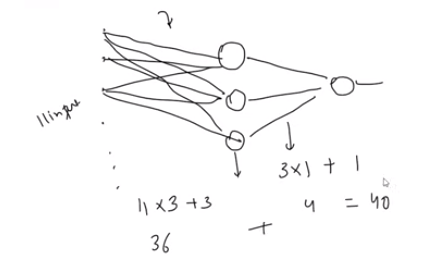


In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 11)                132       
                                                                 
 dense_1 (Dense)             (None, 11)                132       
                                                                 
 dense_2 (Dense)             (None, 1)                 12        
                                                                 
Total params: 276
Trainable params: 276
Non-trainable params: 0
_________________________________________________________________


<br>

`উপরের কাজ গুলো করার পর আমাদের model কে compile করতে হবে । Compilation এ আমরা কোন loss function use করবো । কোন optimizer use করবো gradient descent  এর জন্য তা আমরা বলে দিব। `

- এইখানে আমাদের প্রবলেম হচ্ছে binary classification এর তাই আমরা এইখানে `loss function হিসেবে **binary_crossentropy** or **log loss**`
<br>

In [17]:

# metrics=["accuracy"] add করেছি loss এর সাথে accuracy ও দেখার জন্য । 

model.compile(loss="binary_crossentropy",optimizer="Adam",metrics=["accuracy"])


In [18]:

# ধরি, আম্যাদের কাছে 8k dataset আছে । এর মধ্যে আমরা (8k = 20%) এই dataset এর উপর আমাদের মডেল run করবে । 
# এই 20 dataset দিয়ে এরা নিজেরা test করে আমাদের accuracy ও provide করবে । 

# output এ আমরা tarining loss and accuracy and validation portion loss and accuracy দেখতে পারবো । 
# এখন, যদি আমাদের training loss and accuracy যথাক্রমে কম ও বাড়তে থাকে কিন্তু validation portion এর loss and accuracy 
# এর ক্ষেত্রে তেমন কোন change  হয় না তাহলে আমাদের বুঝতে হবে আমাদের overfitting problem আছে । 

history = model.fit(X_train_sc,y_train,epochs=20,validation_split=0.2)


Epoch 1/20


200/200 [==============================] - 4s 13ms/step - loss: 0.6803 - accuracy: 0.5975 - val_loss: 0.5168 - val_accuracy: 0.7975
Epoch 2/20
200/200 [==============================] - 2s 12ms/step - loss: 0.4781 - accuracy: 0.7981 - val_loss: 0.4600 - val_accuracy: 0.8000
Epoch 3/20
200/200 [==============================] - 2s 11ms/step - loss: 0.4434 - accuracy: 0.8058 - val_loss: 0.4374 - val_accuracy: 0.8062
Epoch 4/20
200/200 [==============================] - 2s 12ms/step - loss: 0.4238 - accuracy: 0.8108 - val_loss: 0.4198 - val_accuracy: 0.8188
Epoch 5/20
200/200 [==============================] - 2s 11ms/step - loss: 0.4057 - accuracy: 0.8172 - val_loss: 0.4022 - val_accuracy: 0.8244
Epoch 6/20
200/200 [==============================] - 2s 10ms/step - loss: 0.3875 - accuracy: 0.8325 - val_loss: 0.3861 - val_accuracy: 0.8338
Epoch 7/20
200/200 [==============================] - 3s 16ms/step - loss: 0.3741 - accuracy: 0.8452 - val_loss: 0.3725 - val_accuracy: 0.8475
Epoch 8/20

---

<br>

###  এখন, আমরা যেই weight and bias এর ভ্যালু গুলো পেলাম model train করার পর সেই গুলো দেখবো। 

- প্রথম layer এ আমাদের ৩৬ টা parameter ছিল । আর এর মধ্যে ৩ টা ছিল bias । 

- output layer এ আমাদের ৪ টা parameter ছিল । এর মধ্যে ১ টা bias ছিল । 

<br>

---

In [19]:

# we get two array one is for weights and another is for bias:

model.layers[0].get_weights()


[array([[-0.2036861 ,  0.03936031,  0.27941984, -0.05394261, -0.18374011,
          0.33076915,  0.01591547,  0.1009002 ,  0.12449894, -0.01399401,
          0.08863023],
        [ 0.27824232,  0.1824073 , -0.4423651 ,  0.37511212,  0.02965022,
          0.55703557, -0.86337095,  0.05887201, -0.71792626, -0.06673579,
         -0.26175073],
        [-0.06559636,  0.15568046,  0.44646236,  0.00474154, -0.2459595 ,
          0.28675777,  0.05414426,  0.09285074, -0.1747346 ,  0.03551431,
         -0.17699772],
        [-0.1161427 ,  0.03118698, -0.5019273 , -0.06036985,  0.05532486,
         -0.3122067 , -0.01919299,  0.20693891,  0.2927776 ,  0.1466779 ,
         -0.7281792 ],
        [-0.21199884,  0.13721828,  0.14393193,  1.3112962 , -0.20991479,
         -0.3759116 ,  0.04563754,  0.7791669 ,  0.03218485,  0.8616968 ,
         -0.04469875],
        [-0.26795968,  0.4070115 , -0.26490924,  0.08905703,  0.10499768,
         -0.6700088 ,  0.2162395 ,  0.17595382, -0.35239977, -0.1300083

In [20]:
model.layers[1].get_weights()

[array([[ 0.02620233,  0.4061471 ,  0.19163568,  0.24247837, -0.8110078 ,
          0.29723367,  0.39525628, -0.243158  , -0.50405437,  0.44715735,
         -0.59925526],
        [ 0.05698433,  0.5646123 ,  0.3929246 , -0.34850168, -0.1161449 ,
          0.5683683 , -0.34348616, -0.08885108, -0.10518233,  0.72963595,
         -0.34604603],
        [ 0.14603879,  0.3973725 , -0.07280312, -0.10745664,  0.14400364,
         -0.0210198 ,  0.12520473, -0.31788906,  0.02705621,  0.6689538 ,
          0.33457494],
        [-0.7737302 ,  0.45906   , -0.9259596 ,  0.66430163,  0.6321042 ,
         -0.13699241, -0.69750595,  0.03537459,  0.7351174 ,  0.4027499 ,
         -0.5486901 ],
        [-0.20000333, -0.26885018, -0.40316015, -0.28253898, -0.18729934,
         -0.08479375,  0.31320933,  0.420651  , -0.1886146 ,  0.31380427,
          0.01603614],
        [-0.01911914,  0.34058294, -0.58291245, -0.48299295, -0.18409908,
         -0.22893834,  0.16553316,  0.13585888, -0.06848931,  0.1878257

In [21]:
# now show the output: 

model.predict(X_test_sc)

63/63 [==============================] - 1s 6ms/step


array([[0.02151891],
       [0.07722035],
       [0.05601417],
       ...,
       [0.00803686],
       [0.11547936],
       [0.24741326]], dtype=float32)

<br>

---

- আমরা যা predict করেছি তার ভ্যালু গুলো (0~1) এর মধ্যে থাকবে । কারণ, আমরা activation function হিসেবে **sigmoid function**  ব্যবহার করেছি ।

- আমরা একটা theshold ব্যবহার করবো । যেমনঃ এই ক্ষেত্রে আমরা 0.5 ব্যবহার করতে পারি । 0.5 এর উপরে পেলে 1 আর এর নিচে পেলে 0 
---

<br>

In [22]:

y_log = model.predict(X_test_sc)


21/63 [=========>....................] - ETA: 0s

63/63 [==============================] - 0s 6ms/step


In [23]:
y_pred = np.where(y_log>0.5,1,0)

In [24]:
from sklearn.metrics import accuracy_score

score = accuracy_score(y_test,y_pred)

score

0.8575

---

# আমরা accuracy পেয়েছিঃ 79% 
## এখন অ্যামরা এই accuracy কে বাড়াতে পারিঃ 
- number of epochs বাড়াতে পারি, normally 100,1000 রাখা হয় । 
- activation function relu ব্যবহার করলে accuracy বাড়তে পারে । 
- Hidder layer এ number of node বাড়ানোর মাধ্যমে । 
- Number of hidden layer বাড়াতে পারি ।  

---

<br> <br>

আমরা আমাদের model fit করার সময় তার সকল  information গুলো history নামে  একটা dictionary তে save  করে রেখেছিলাম এখন আমরা সেই dictionary  থেকে এখন আমরা যেকোন stage এর গ্রাফ একে analysis করতে পারি । 

<br> <br>

In [25]:
import matplotlib.pyplot as plt


In [26]:

history.history

{'loss': [0.6803125739097595,
  0.47808343172073364,
  0.4434231221675873,
  0.42383354902267456,
  0.40569934248924255,
  0.3875312805175781,
  0.3740704357624054,
  0.3642667531967163,
  0.3580312430858612,
  0.3538600206375122,
  0.3506506085395813,
  0.3488548994064331,
  0.3466634750366211,
  0.3448167145252228,
  0.3439325988292694,
  0.34284424781799316,
  0.34203723073005676,
  0.34084373712539673,
  0.33962002396583557,
  0.33853602409362793],
 'accuracy': [0.5975000262260437,
  0.7981250286102295,
  0.8057812452316284,
  0.8107812404632568,
  0.817187488079071,
  0.8324999809265137,
  0.8451562523841858,
  0.8482812643051147,
  0.8521875143051147,
  0.856249988079071,
  0.8589062690734863,
  0.8568750023841858,
  0.8596875071525574,
  0.8596875071525574,
  0.8612499833106995,
  0.8621875047683716,
  0.8614062666893005,
  0.8600000143051147,
  0.8620312213897705,
  0.8614062666893005],
 'val_loss': [0.51677405834198,
  0.4600471556186676,
  0.4374127984046936,
  0.419844537973

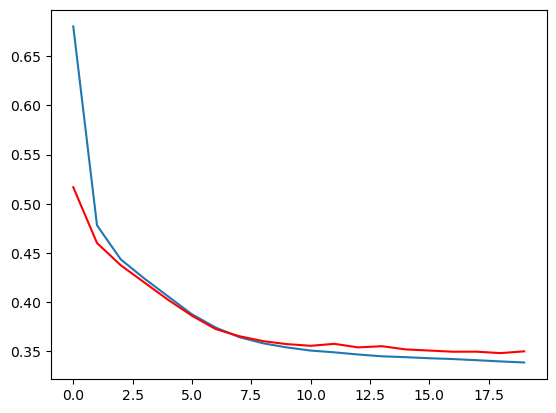

In [27]:


plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"],c='r')

#  আমাদের overfitting অনেক কম সেইটা এই গ্রাফ থেকে আমরা দেখতে পারি । 


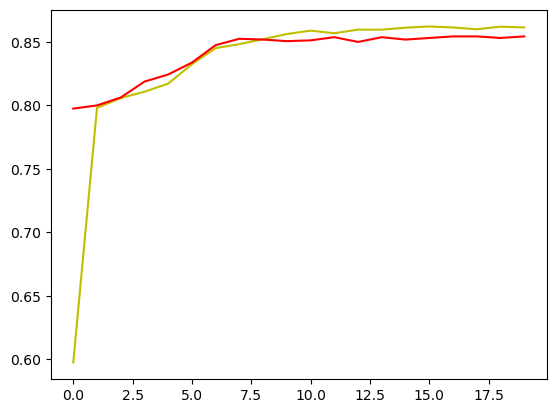

In [28]:

plt.plot(history.history["accuracy"],c='y')
plt.plot(history.history["val_accuracy"],c='r')

#  আমাদের overfitting অনেক কম সেইটা এই গ্রাফ থেকে আমরা দেখতে পারি । 